- This notebook is to checking the composition concentration impact for the model performance (amphiphiles example) by using package functions (and plot GP prediction together)


In [1]:
import sys
sys.path.append("../src/models")
sys.path.append("../src")
sys.path.append("../")

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [3]:
from utils import *
from Concentration import *

In [4]:
# Get concentration information
file_path='../../data/df_input_update_ori_20240812.csv'
info_path = '../../data/Info.csv'

df_structured = get_data_AL(file_path, info_path)
df_structured.head()

(336, 8)
(336, 15)


/Users/haoliu/Documents/GitHub/FoundationModel_on_Liposome/code/notebooks/../src/Concentration.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_input.iloc[:,0:7] = df_input.iloc[:,0:7].applymap(lambda x: np.log1p(x))
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/rdkit/Chem/PandasPatcher.py:132: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,smi1,conc1,smi2,conc2,smi3,conc3,smi4,conc4,smi5,conc5,smi6,conc6,smi7,conc7,vesicles_formation
0,CCCCCCCCCC(=O)O,0.615186,CCCCCCCCCC(=O)[O-],0.955511,CCCCCCCCCCN,1.231101,CCCCCCCCCC[N+](C)(C)C.[Br-],1.552868,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.677097,CCCCCCCCCCO,0.441476,CCCCCCCCCC(=O)OCC(CO)O,0.579418,22
1,CCCCCCCCCC(=O)O,1.487270,CCCCCCCCCC(=O)[O-],0.644482,CCCCCCCCCCN,0.175633,CCCCCCCCCC[N+](C)(C)C.[Br-],1.056053,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.216395,CCCCCCCCCCO,0.207827,CCCCCCCCCC(=O)OCC(CO)O,0.107059,9
2,CCCCCCCCCC(=O)O,1.163151,CCCCCCCCCC(=O)[O-],0.705570,CCCCCCCCCCN,1.294727,CCCCCCCCCC[N+](C)(C)C.[Br-],1.787584,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.658228,CCCCCCCCCCO,0.159138,CCCCCCCCCC(=O)OCC(CO)O,0.202941,6
3,CCCCCCCCCC(=O)O,1.531476,CCCCCCCCCC(=O)[O-],1.787584,CCCCCCCCCCN,0.381855,CCCCCCCCCC[N+](C)(C)C.[Br-],0.071390,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.475907,CCCCCCCCCCO,0.589175,CCCCCCCCCC(=O)OCC(CO)O,0.113329,2
4,CCCCCCCCCC(=O)O,1.170933,CCCCCCCCCC(=O)[O-],1.441019,CCCCCCCCCCN,1.677097,CCCCCCCCCC[N+](C)(C)C.[Br-],0.885832,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.011601,CCCCCCCCCCO,0.750236,CCCCCCCCCC(=O)OCC(CO)O,0.300105,36


In [5]:
model_path_gp = '../../data/GPC_model_20240713.pkl' # GP model
with open(model_path_gp, 'rb') as file:
    model_gp_ = pickle.load(file)

/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator _BinaryGaussianProcessClassifierLaplace from version 1.2.2 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator GaussianProcessClassifier from version 1.2.2 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [11]:
model_path_fm = "clf_model_AL_20250505.pkl"
with open(model_path_fm, "rb") as f:
    model_clf_ = pickle.load(f)

/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [08:34:42] WARNING: /Users/runner/work/xgboost/xgboost/src/gbm/../common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)


In [1]:
# pip install --upgrade scikit-learn==1.6.1

In [4]:
model_path_fm = "clf_randomclassifier_AL_20250508.pkl"
with open(model_path_fm, "rb") as f:
    model_clf_ran = pickle.load(f)

/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.6.1 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [12]:
model_path_fm_gp = "clf_gpclassifier_AL_20250508.pkl"
with open(model_path_fm_gp, "rb") as f:
    model_clf_gp = pickle.load(f)

In [ ]:
# Scale of gaussian classifier could be very different, but random forest classifier doesn't care about scale?

Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding


/Users/haoliu/anaconda3/envs/fm4m/lib/python3.9/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 36.21it/s]
/Users/haoliu/Documents/GitHub/FoundationModel_on_Liposome/code/notebooks/../src/Concentration.py:98: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_train_emb = train_df.applymap(lambda x: replace_with_list(x, train_dict))


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 40.67it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 30.57it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 40.20it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 38.44it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 40.74it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 47.35it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 35.32it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 34.78it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 37.29it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 31.81it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 33.65it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 39.21it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 31.23it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 46.90it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 32.67it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 42.83it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 37.08it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 36.72it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 31.19it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 22.89it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 32.92it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 39.96it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 34.69it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 39.48it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 34.97it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 44.27it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 37.89it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 40.01it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 25.85it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 26.94it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 32.59it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 28.88it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 28.90it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 30.33it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 30.28it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 37.19it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 28.48it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 26.92it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 28.69it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 27.58it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 27.31it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 31.89it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 29.65it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 33.43it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 44.04it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 34.75it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 31.22it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 36.18it/s]


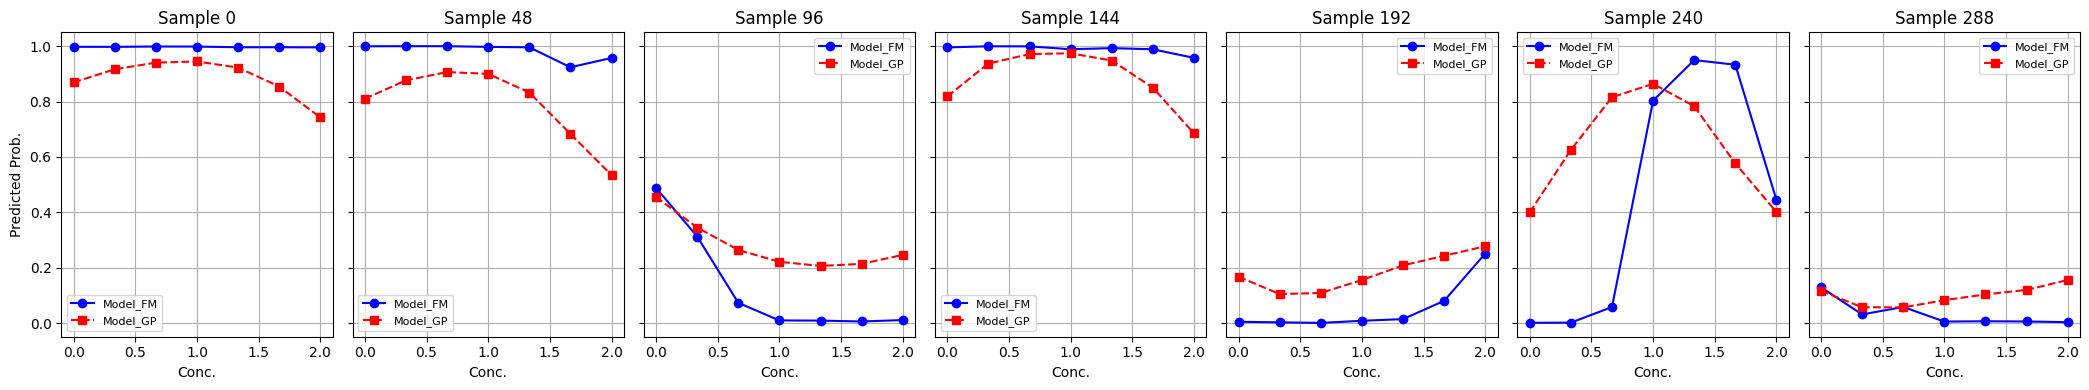

In [8]:
# XGBClassifier
min_conc = 0
max_conc = 2
num_points = 7
custom_conc = np.linspace(min_conc, max_conc, num_points)
component_idx = 3

results, selected_indices = perturb_predict_compare_plot_subplots(
    df=df_structured,
    component_idx=component_idx,
    model_clf=model_clf_,
    model_gp=model_gp_,
    num_points=num_points,
    custom_conc_series=custom_conc,
    n_samples=7,
    step=48,
    figsize=(21, 4)
)


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding


/Users/haoliu/anaconda3/envs/fm4m/lib/python3.9/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 31.99it/s]
/Users/haoliu/Documents/GitHub/FoundationModel_on_Liposome/code/notebooks/../src/Concentration.py:98: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_train_emb = train_df.applymap(lambda x: replace_with_list(x, train_dict))


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 38.71it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 35.41it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 32.49it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 38.52it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 31.01it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 29.50it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 36.25it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 28.40it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 25.59it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 35.24it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 38.01it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 29.78it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 26.63it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 46.55it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 31.94it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 29.24it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 30.25it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 29.11it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 32.58it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 36.46it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 36.01it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 43.79it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 28.38it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 38.53it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 39.73it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 31.44it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 29.30it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 37.65it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 27.91it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 31.68it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 27.71it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 36.77it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 34.19it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 29.36it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 29.13it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 33.53it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 33.95it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 34.60it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 31.94it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 33.76it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 35.43it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 35.26it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 37.17it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 33.10it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 36.35it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 37.11it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 31.66it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 30.62it/s]


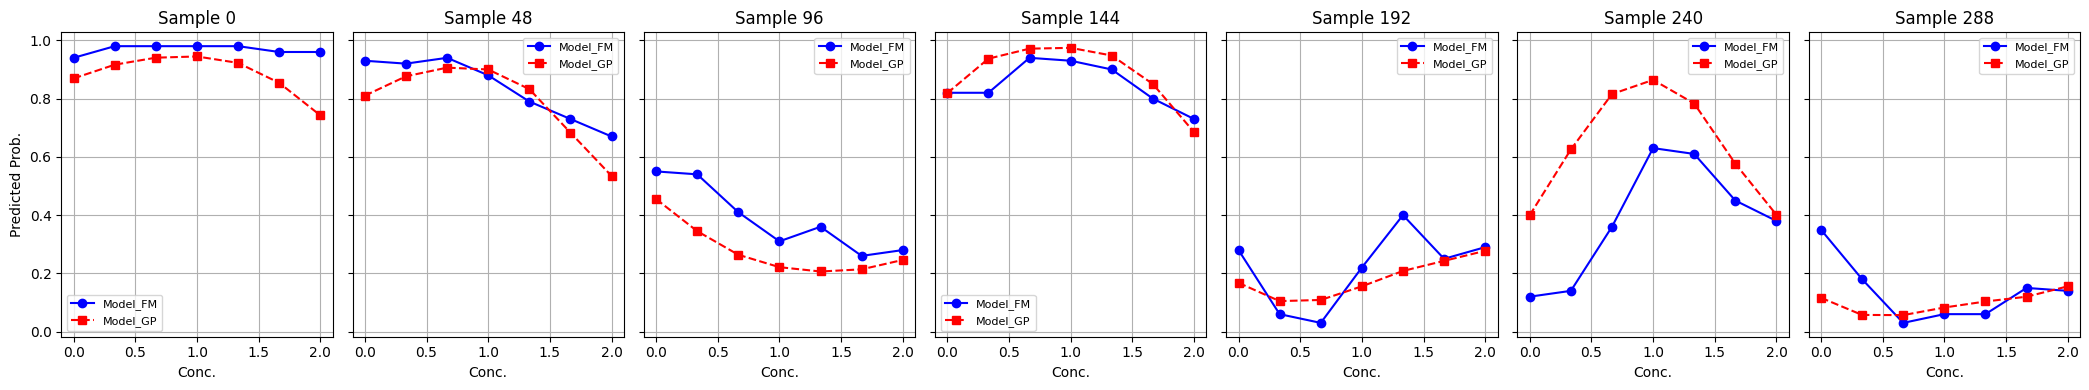

In [9]:
# Let's try the random forest classifier for fm 
min_conc = 0
max_conc = 2
num_points = 7
custom_conc = np.linspace(min_conc, max_conc, num_points)
component_idx = 3

results, selected_indices = perturb_predict_compare_plot_subplots(
    df=df_structured,
    component_idx=component_idx,
    model_clf=model_clf_ran,
    model_gp=model_gp_,
    num_points=num_points,
    custom_conc_series=custom_conc,
    n_samples=7,
    step=48,
    figsize=(21, 4)
)

In [11]:
# So looks like random forest is more close, great! this is reasonable, because same type classifier should be more close

In [ ]:
# AH! So may be I should not use Gaussianprocessclassifier, it turns out scale is different, so maybe not good

Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding


/Users/haoliu/anaconda3/envs/fm4m/lib/python3.9/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 32.29it/s]
/Users/haoliu/Documents/GitHub/FoundationModel_on_Liposome/code/notebooks/../src/Concentration.py:98: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_train_emb = train_df.applymap(lambda x: replace_with_list(x, train_dict))


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 44.38it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 36.95it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 40.88it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 42.18it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 33.89it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 41.05it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 35.93it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 49.08it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 38.47it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 42.70it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 33.49it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 25.99it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 34.28it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 36.64it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 29.43it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 32.27it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 67.94it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 25.12it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 26.31it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 26.83it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 31.07it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 30.00it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 28.73it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 27.91it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 27.80it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 31.46it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 28.08it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 44.36it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 32.50it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 28.53it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 41.34it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 35.13it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 28.28it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 33.10it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 26.65it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 26.60it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 31.25it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 32.57it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 30.70it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 31.74it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 33.34it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 37.80it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 37.66it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 39.01it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 41.43it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 34.37it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 33.76it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 31.09it/s]


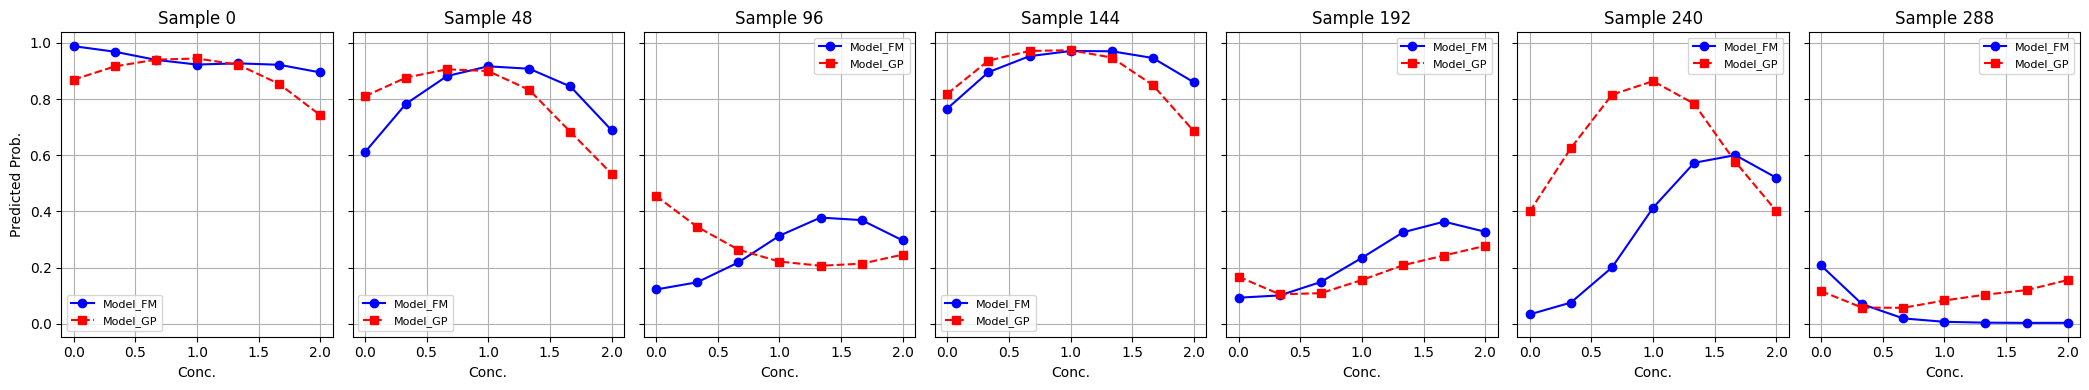

In [13]:
# Let's try the random forest classifier for fm 
min_conc = 0
max_conc = 2
num_points = 7
custom_conc = np.linspace(min_conc, max_conc, num_points)
component_idx = 3

results, selected_indices = perturb_predict_compare_plot_subplots(
    df=df_structured,
    component_idx=component_idx,
    model_clf=model_clf_gp,# classifier for fm representation
    model_gp=model_gp_,
    num_points=num_points,
    custom_conc_series=custom_conc,
    n_samples=7,
    step=48,
    figsize=(21, 4)
)


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding


/Users/haoliu/anaconda3/envs/fm4m/lib/python3.9/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 32.00it/s]
/Users/haoliu/Documents/GitHub/FoundationModel_on_Liposome/code/notebooks/../src/Concentration.py:98: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_train_emb = train_df.applymap(lambda x: replace_with_list(x, train_dict))


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 27.98it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 47.54it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 30.54it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 32.54it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 27.77it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 28.76it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 32.80it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 30.58it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 39.08it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 40.66it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 39.16it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 35.42it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 34.71it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 35.25it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 38.24it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 33.11it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 39.36it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 35.31it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 32.17it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 36.25it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 42.49it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 29.33it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 36.52it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 39.00it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 22.03it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 33.49it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 45.45it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 29.61it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 46.09it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 34.41it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 29.04it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 28.94it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 39.93it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 33.13it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 38.72it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 34.97it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 30.28it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 33.61it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 36.95it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 40.34it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 29.97it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 45.02it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 42.39it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 36.38it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 20.27it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 38.53it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 31.11it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 30.18it/s]


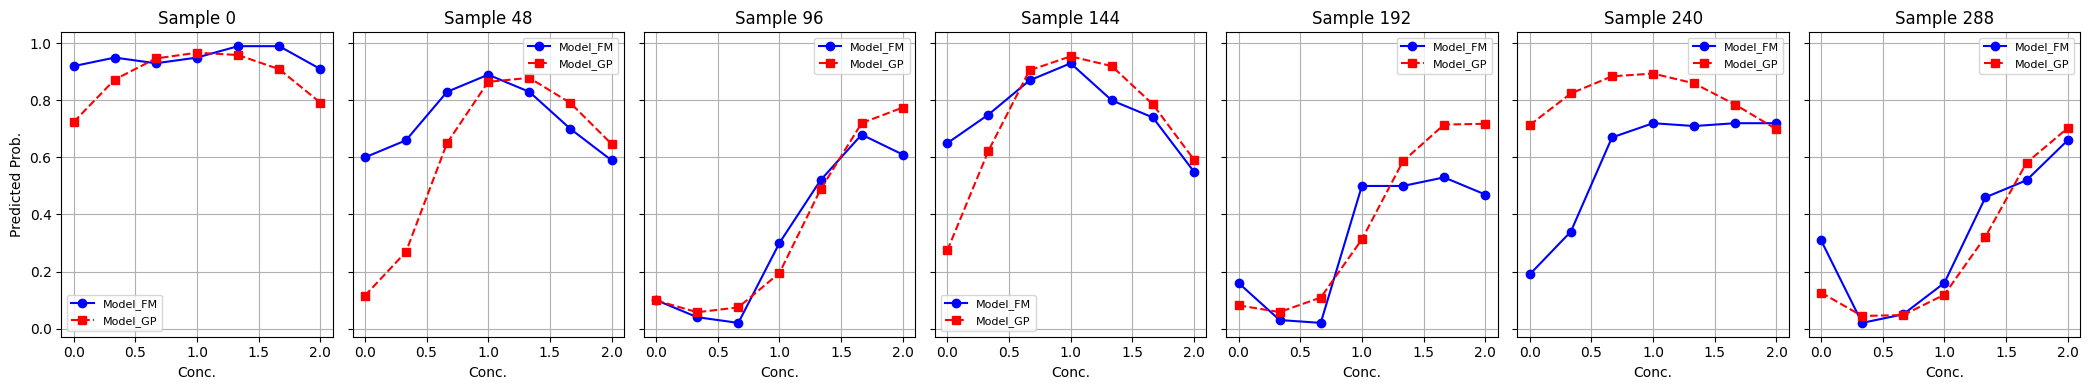

In [27]:
# smi4
min_conc = 0
max_conc = 2
num_points = 7
custom_conc = np.linspace(min_conc, max_conc, num_points)
component_idx = 4

results0, selected_indices = perturb_predict_compare_plot_subplots(
    df=df_structured,
    component_idx=component_idx,
    model_clf=model_clf_ran,
    model_gp=model_gp_,
    num_points=num_points,
    custom_conc_series=custom_conc,
    n_samples=7,
    step=48,
    figsize=(21, 4)
)

In [ ]:
# Looks like random forest classifier is most similar one, let's use Randomforest classifier temporaily

Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.37it/s]
/Users/haoliu/Documents/GitHub/FoundationModel_on_Liposome/code/notebooks/../src/Concentration.py:94: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_train_emb = train_df.applymap(lambda x: replace_with_list(x, train_dict))


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.92it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.05it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  3.96it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00,  7.63it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.96it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.25it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00,  7.65it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.00it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00,  7.38it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.37it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.96it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  3.73it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.09it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.62it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.51it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.52it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.57it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:02<00:00,  2.95it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.33it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.97it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.50it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.43it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.51it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  3.99it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.93it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.63it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.09it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.30it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.79it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.67it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.73it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:02<00:00,  3.49it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.58it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.25it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.42it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.24it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.34it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.46it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.10it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.93it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.04it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.34it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.63it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.82it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.38it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.85it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.39it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.74it/s]


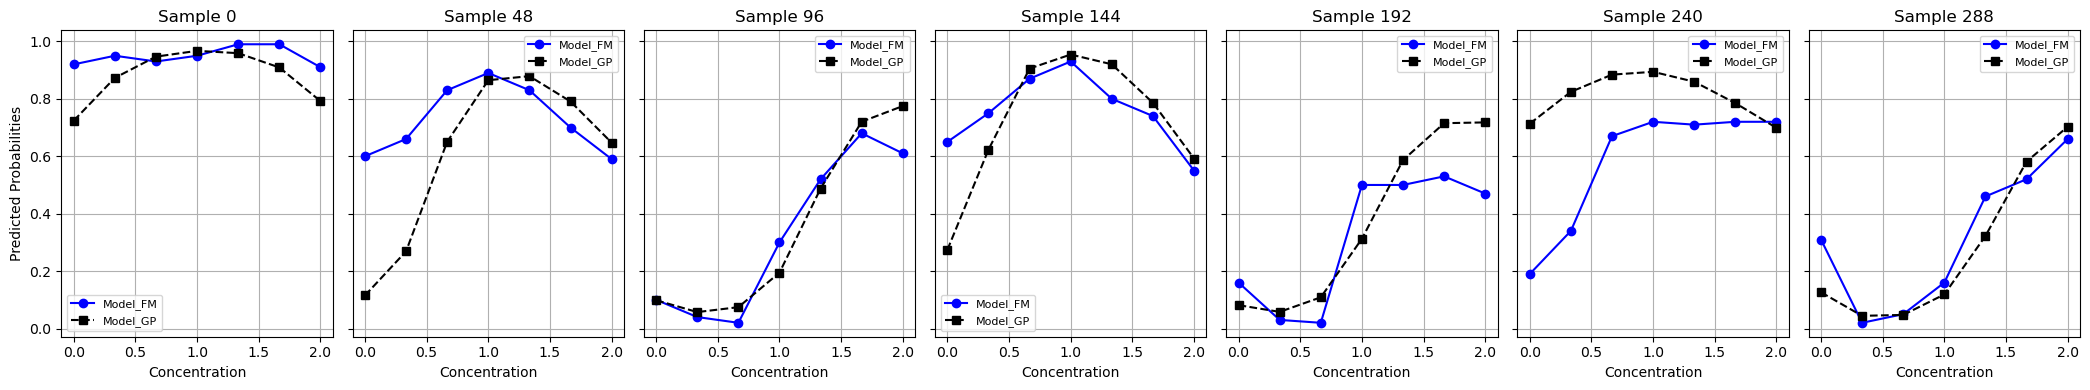

ValueError: too many values to unpack (expected 2)

In [7]:
# Different color scheme
min_conc = 0
max_conc = 2
num_points = 7
custom_conc = np.linspace(min_conc, max_conc, num_points)
component_idx = 4

results0, selected_indices = perturb_predict_compare_plot_subplots(
    df=df_structured,
    component_idx=component_idx,
    model_clf=model_clf_ran,
    model_gp=model_gp_,
    num_points=num_points,
    custom_conc_series=custom_conc,
    n_samples=7,
    step=48,
    figsize=(21, 4)
)

Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.55it/s]
/Users/haoliu/Documents/GitHub/FoundationModel_on_Liposome/code/notebooks/../src/Concentration.py:94: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_train_emb = train_df.applymap(lambda x: replace_with_list(x, train_dict))


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.77it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.96it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.53it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.31it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.76it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.95it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.04it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.97it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.61it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00,  8.02it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:02<00:00,  3.49it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00,  8.30it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00,  8.26it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00,  7.18it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00,  7.91it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.51it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.20it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:02<00:00,  2.50it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.85it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.48it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.91it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.51it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:02<00:00,  2.98it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.62it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.38it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  3.77it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.09it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.88it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.73it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.91it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.12it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.70it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.21it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.26it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.01it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.87it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.61it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.60it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.89it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.67it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.45it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.39it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.33it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.74it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  3.94it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.85it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00,  7.16it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.78it/s]


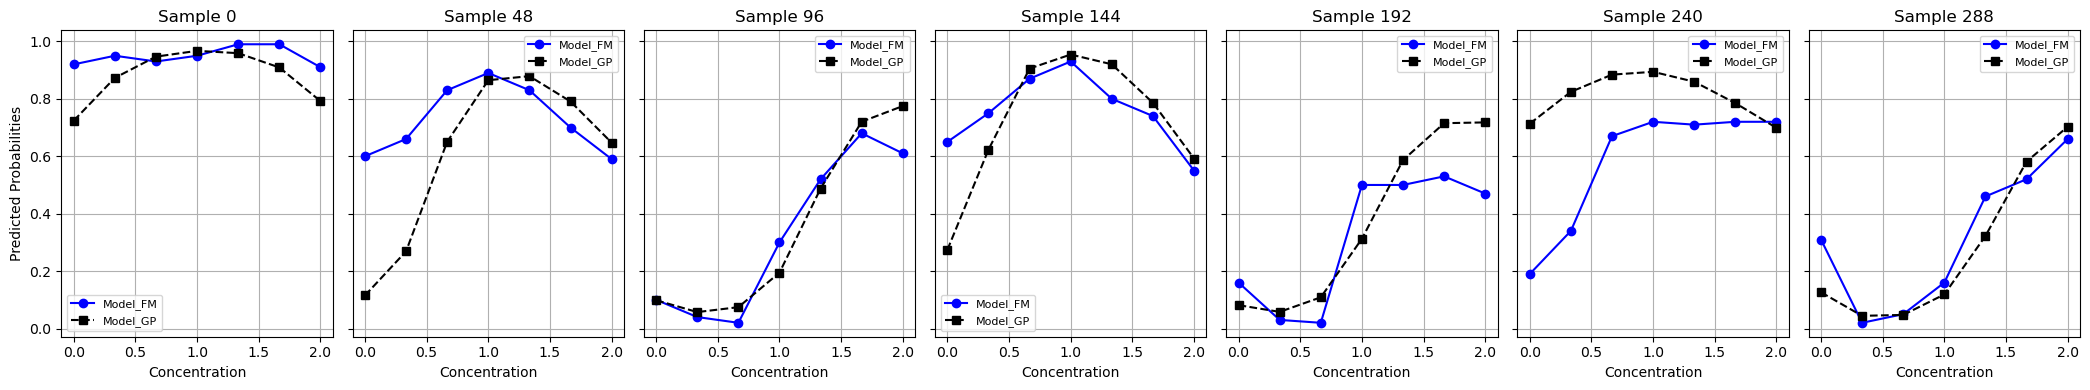

In [7]:
min_conc = 0
max_conc = 2
num_points = 7
custom_conc = np.linspace(min_conc, max_conc, num_points)
component_idx = 4

results0, selected_indices,_ = perturb_predict_compare_plot_subplots(
    df=df_structured,
    component_idx=component_idx,
    model_clf=model_clf_ran,
    model_gp=model_gp_,
    num_points=num_points,
    custom_conc_series=custom_conc,
    n_samples=7,
    step=48,
    figsize=(21, 4)
)

Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  3.74it/s]
/Users/haoliu/Documents/GitHub/FoundationModel_on_Liposome/code/notebooks/../src/Concentration.py:94: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_train_emb = train_df.applymap(lambda x: replace_with_list(x, train_dict))


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.81it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.05it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00,  7.70it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  3.63it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:02<00:00,  3.21it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  3.51it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.48it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.20it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.50it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.87it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.32it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.42it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.78it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.27it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.45it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.57it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  3.76it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  3.59it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.37it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:02<00:00,  3.44it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.79it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.95it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.53it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.69it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.15it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.87it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.33it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.23it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.78it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:02<00:00,  3.48it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.46it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.51it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.88it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.74it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.21it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.54it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.75it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.07it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.97it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.14it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.41it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  3.91it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.59it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.82it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.90it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.48it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.87it/s]


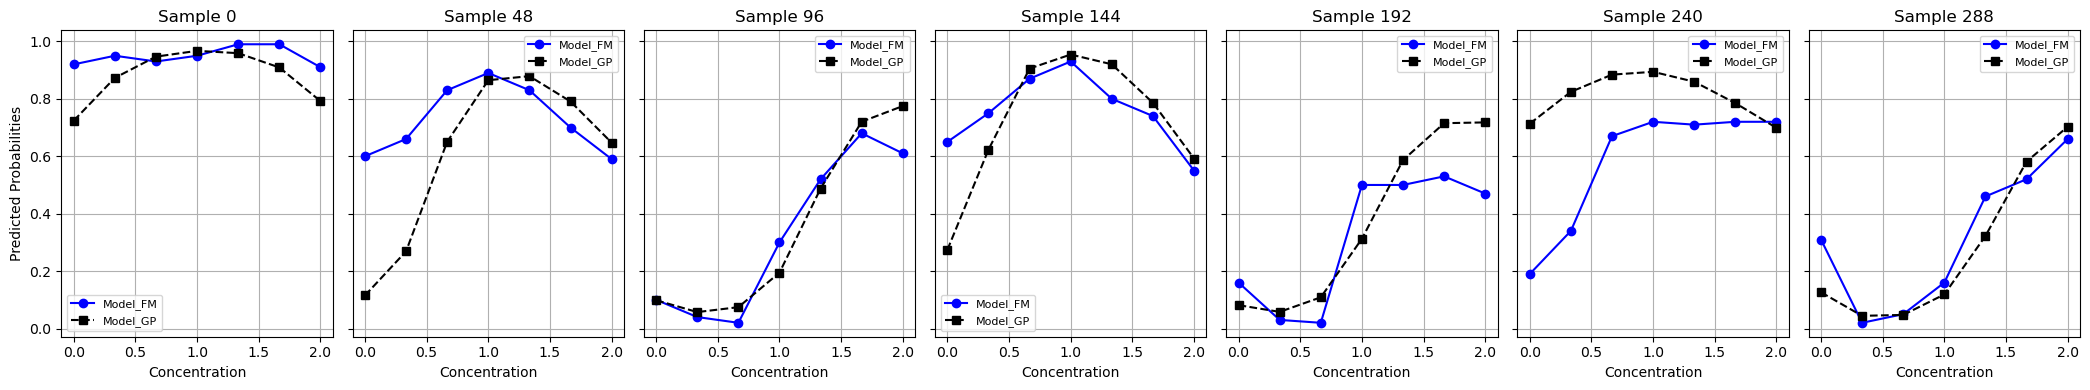

In [7]:
# Reformat plot
min_conc = 0
max_conc = 2
num_points = 7
custom_conc = np.linspace(min_conc, max_conc, num_points)
component_idx = 4

results0, selected_indices,_ = perturb_predict_compare_plot_subplots(
    df=df_structured,
    component_idx=component_idx,
    model_clf=model_clf_ran,
    model_gp=model_gp_,
    num_points=num_points,
    custom_conc_series=custom_conc,
    n_samples=7,
    step=48,
    figsize=(21, 4)
)

### Replace with new molecules

In [8]:
info_path = '/Users/haoliu/Documents/Hao/Fordham/Cheminformatics/MD/Amphiphiles/info_new_molecules.csv'
df_info = pd.read_csv(info_path)
replacement_smiles_similar = df_info['SMILES'].iloc[:5].tolist()
replacement_smiles_dissimilar = df_info['SMILES'].iloc[5:].tolist()
print(replacement_smiles_similar)
print(replacement_smiles_dissimilar)

['CCCCCCCCCC=O', 'CC(=CCC/C(=C/CO)/C)C', 'CCCCCCCCCCCCCCCC(=O)O', 'CCCC/C=C\\CCCCCCCC(=O)O', 'CCCCCCCCOC(=O)CN.Cl']
['C(=O)(C(C(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F)O', 'C(CS(=O)(=O)O)C(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F', 'C(C(C(C(C(F)(F)S(=O)(=O)[O-])(F)F)(F)F)(F)F)(C(C(C(F)(F)F)(F)F)(F)F)(F)F.[K+]']


In [9]:
def replace_entire_smi_column(df, smi_column, new_smi):
    """
    Replace the entire smi_column in df with a single new SMILES.

    Parameters:
    - df: pd.DataFrame — df_structured
    - smi_column: str — column to replace (e.g., "smi3")
    - new_smi: str — SMILES string to set for the whole column

    Returns:
    - df_new: pd.DataFrame — modified copy
    """
    df_new = df.copy()

    if smi_column not in df.columns:
        raise ValueError(f"{smi_column} not found in DataFrame columns.")
    
    df_new[smi_column] = new_smi

    return df_new

In [10]:
df_new1 = replace_entire_smi_column(
    df=df_structured,
    smi_column='smi4',
    new_smi=replacement_smiles_similar[0]   # 'CCCCCCCCCC=O'
)

df_new2 = replace_entire_smi_column(
    df=df_structured,
    smi_column='smi4',
    new_smi=replacement_smiles_dissimilar[0]   # 'CCCCCCCCCC=O'
)

In [11]:
n_samples=7
step=48
component_idx=4
min_conc = 0
max_conc = 2
num_points = 7
custom_conc = np.linspace(min_conc, max_conc, num_points)
selected_indices = [i * step for i in range(n_samples)]

In [12]:
results1 = perturb_and_embed(
        df=df_new1, 
        row_indices=selected_indices, 
        component_idx=component_idx, 
        num_points=num_points, 
        custom_conc_series=custom_conc
    )

results2 = perturb_and_embed(
        df=df_new2, 
        row_indices=selected_indices, 
        component_idx=component_idx, 
        num_points=num_points, 
        custom_conc_series=custom_conc
    )

Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.72it/s]
/Users/haoliu/Documents/GitHub/FoundationModel_on_Liposome/code/notebooks/../src/Concentration.py:94: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_train_emb = train_df.applymap(lambda x: replace_with_list(x, train_dict))


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.45it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.82it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.31it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00,  7.69it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.13it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00,  7.04it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.70it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.35it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.89it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.48it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.03it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.15it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.59it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.25it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.19it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.71it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.65it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.72it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.45it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.38it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.07it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.87it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.15it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.20it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.44it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.81it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.32it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.67it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.65it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.63it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.40it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.50it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.62it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.55it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.25it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.71it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.10it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.82it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.85it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.72it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.83it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.50it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.86it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.06it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.82it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.98it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.78it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.91it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.18it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.83it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.81it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.57it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.80it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.20it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.54it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.14it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.50it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.26it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.88it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.98it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.44it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.51it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.01it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.90it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.17it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.50it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.16it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.60it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.23it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:02<00:00,  3.29it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.16it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.34it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  3.74it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.24it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.50it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.44it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.75it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.90it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.35it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.01it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.34it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.83it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.50it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.00it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.47it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.04it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.25it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.91it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.32it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.06it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.38it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.94it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.41it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.57it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.59it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:02<00:00,  3.48it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  3.82it/s]


In [26]:
results[0]['x_smi_list'][0]

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,1.818909,-2.647745,0.663579,2.357213,2.850056,-3.962579,7.271478,0.54936,5.153509,1.351,...,-7.596285,-1.255623,1.581299,1.815921,-3.014057,2.862145,-3.329001,5.224691,3.593592,-0.28572


In [10]:
results0[0]['conc_values']

array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
       1.66666667, 2.        ])

In [15]:
results0

{0: {'conc_values': array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
         1.66666667, 2.        ]),
  'x_smi_list': [        0         1         2         3         4         5         6    \
   0  1.637088 -2.266747  0.587849  2.248015  2.502752 -3.906982  6.869718   
   
           7         8        9    ...       758       759       760       761  \
   0  0.532939  4.832387  1.31853  ... -7.118505 -0.989453  1.467405  1.636094   
   
           762       763       764       765       766       767  
   0 -2.943968  2.787018 -3.151638  5.130077  3.369348 -0.259073  
   
   [1 rows x 768 columns],
           0        1         2        3         4         5         6    \
   0  1.743587 -2.45912  0.631144  2.37734  2.694636 -4.103213  7.307595   
   
           7         8         9    ...       758      759       760       761  \
   0  0.562402  5.124029  1.398143  ... -7.556821 -1.06958  1.549142  1.737025   
   
           762       763       764       765   

In [16]:
import joblib

# Save
joblib.dump(results0, "results0_20250904.pkl")
joblib.dump(results1, "results1_20250904.pkl")
joblib.dump(results2, "results2_20250904.pkl")

# Later, load
# results0_loaded = joblib.load("results0.pkl")
# results1_loaded = joblib.load("results1.pkl")
# results2_loaded = joblib.load("results2.pkl")

['results2_20250904.pkl']

In [5]:
import joblib
results0 = joblib.load("results0_20250904.pkl")
results1 = joblib.load("results1_20250904.pkl")
results2 = joblib.load("results2_20250904.pkl")

/var/folders/wn/w203521n4h18b4_rz5rd9tw80000gp/T/ipykernel_32142/3433966004.py:52: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = model_clf.predict_proba(x_smi_list[i])[:, 1]
/var/folders/wn/w203521n4h18b4_rz5rd9tw80000gp/T/ipykernel_32142/3433966004.py:52: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = model_clf.predict_proba(x_smi_list[i])[:, 1]
/var/folders/wn/w203521n4h18b4_rz5rd9tw80000gp/T/ipykernel_32142/3433966004.py:52: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operat

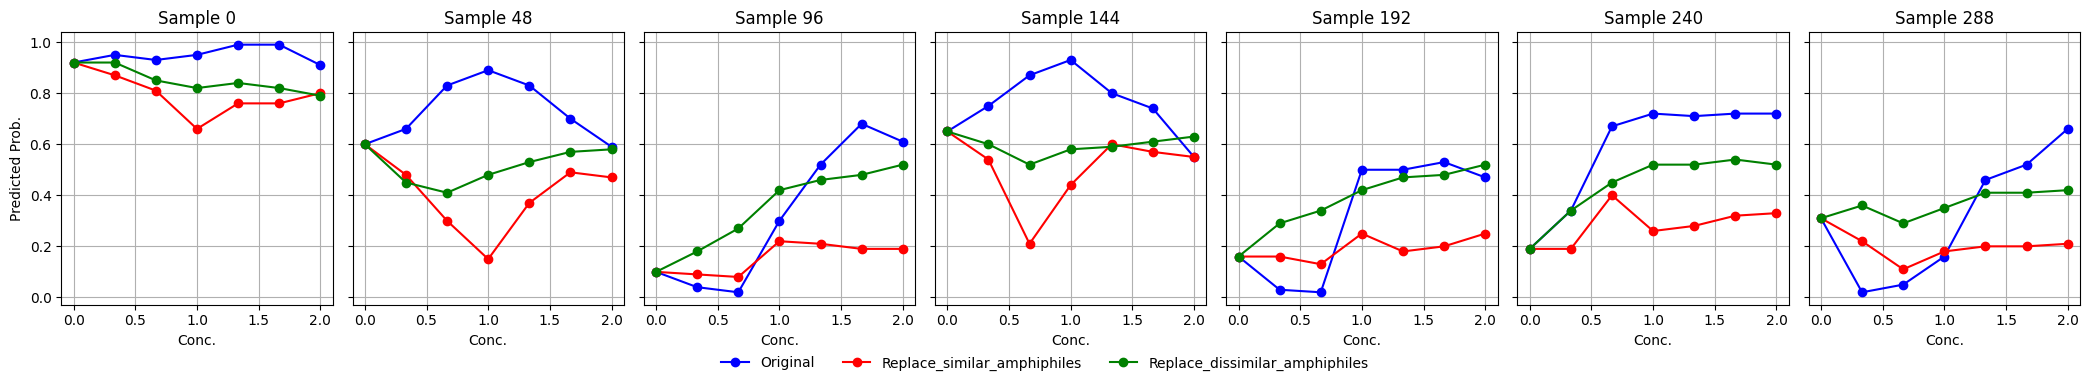

In [41]:
results_list = [results0, results1, results2]
labels = ['Original', 'Replace_similar_amphiphiles', 'Replace_dissimilar_amphiphiles']
selected_indices = [0, 48, 96, 144, 192, 240, 288]  # same indices used in your original runs
custom_conc = np.linspace(0, 2, 7)

compare_results_multiple_runs(
    results_list=results_list,
    model_clf=model_clf_ran,
    selected_indices=selected_indices,
    custom_conc_series=custom_conc,
    labels=labels,
    legend_loc='bottom'
)

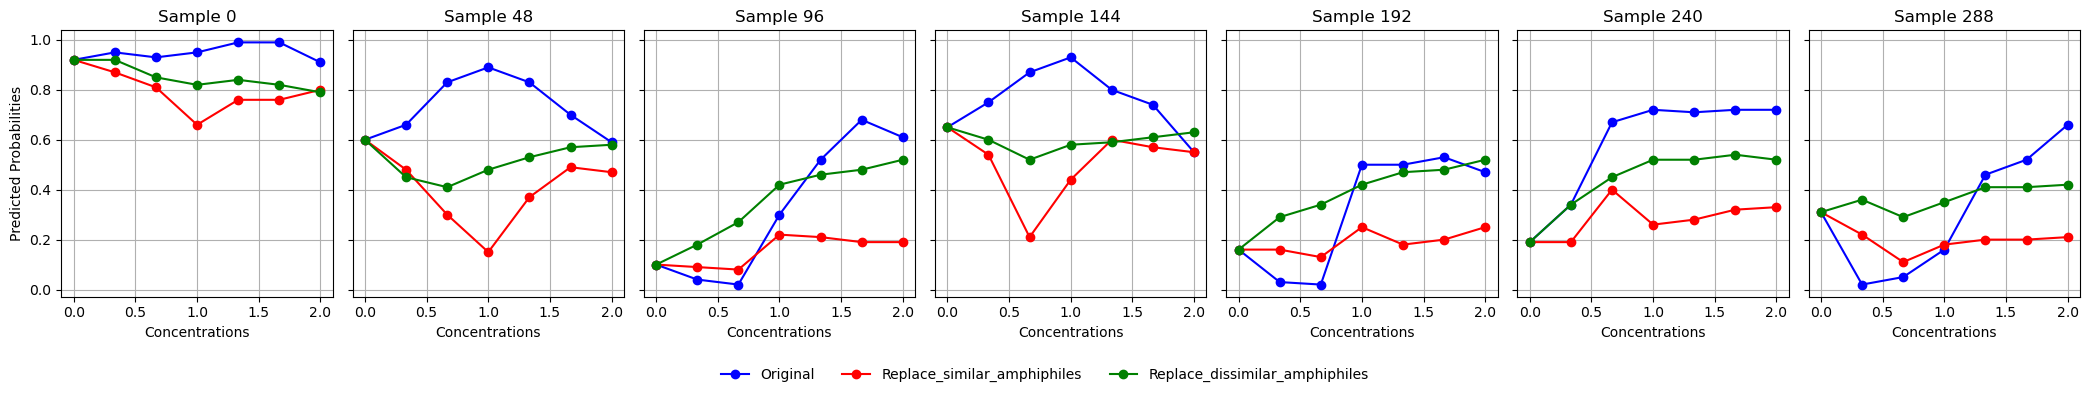

In [6]:
results_list = [results0, results1[0], results2[0]]
labels = ['Original', 'Replace_similar_amphiphiles', 'Replace_dissimilar_amphiphiles']
selected_indices = [0, 48, 96, 144, 192, 240, 288]  # same indices used in your original runs
custom_conc = np.linspace(0, 2, 7)

compare_results_multiple_runs(
    results_list=results_list,
    model_clf=model_clf_ran,
    selected_indices=selected_indices,
    custom_conc_series=custom_conc,
    labels=labels,
    legend_loc='bottom'
)

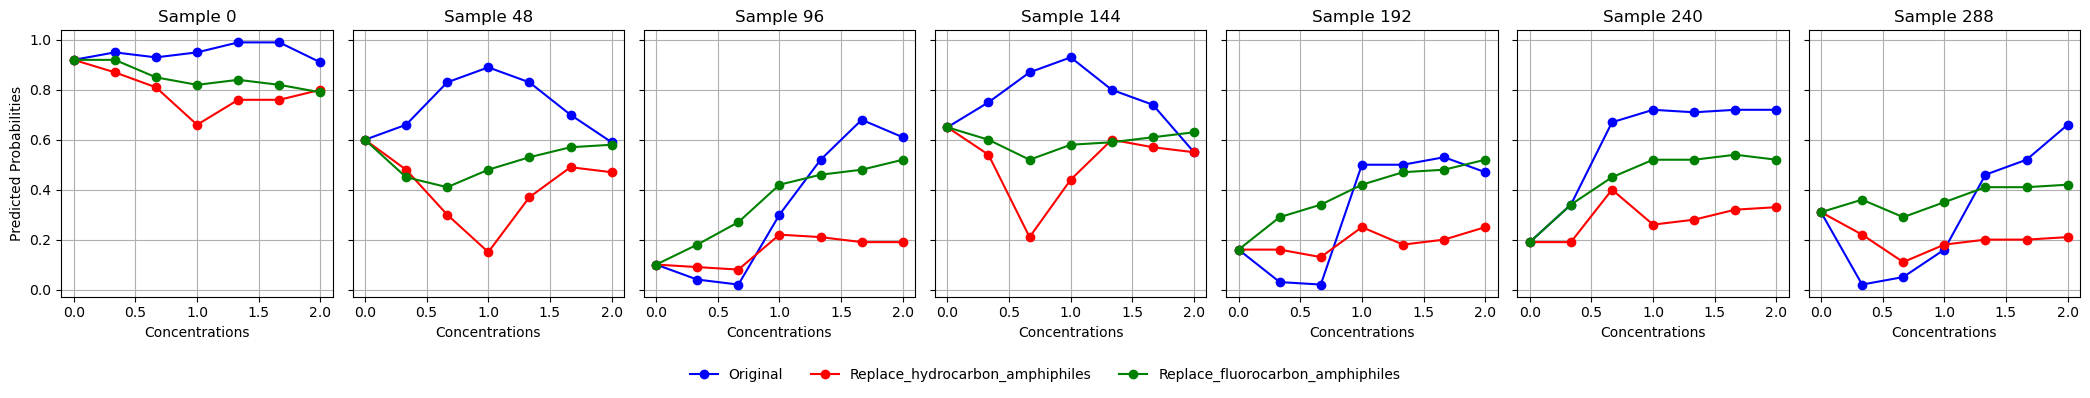

In [13]:
# Rename legend
results_list = [results0, results1[0], results2[0]]
labels = ['Original', 'Replace_hydrocarbon_amphiphiles', 'Replace_fluorocarbon_amphiphiles']
selected_indices = [0, 48, 96, 144, 192, 240, 288]  # same indices used in your original runs
custom_conc = np.linspace(0, 2, 7)

compare_results_multiple_runs(
    results_list=results_list,
    model_clf=model_clf_ran,
    selected_indices=selected_indices,
    custom_conc_series=custom_conc,
    labels=labels,
    legend_loc='bottom'
)

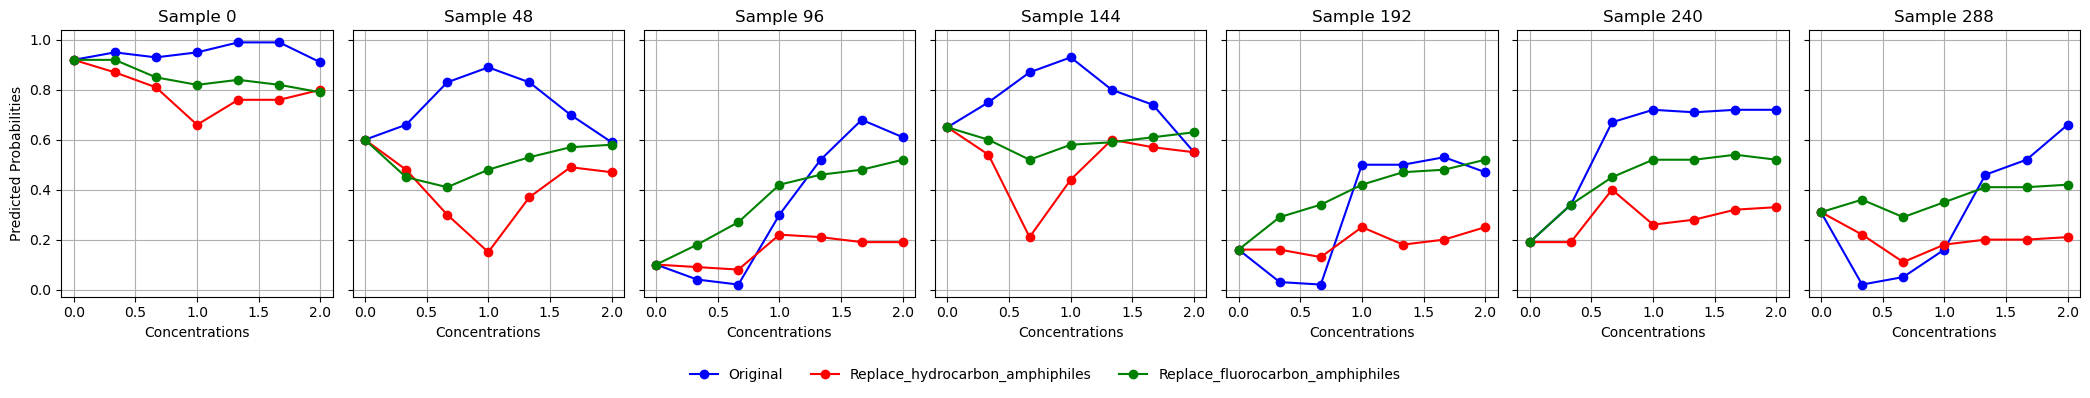

In [6]:
# Reformat plot
results_list = [results0, results1[0], results2[0]]
labels = ['Original', 'Replace_hydrocarbon_amphiphiles', 'Replace_fluorocarbon_amphiphiles']
selected_indices = [0, 48, 96, 144, 192, 240, 288]  # same indices used in your original runs
custom_conc = np.linspace(0, 2, 7)

compare_results_multiple_runs(
    results_list=results_list,
    model_clf=model_clf_ran,
    selected_indices=selected_indices,
    custom_conc_series=custom_conc,
    labels=labels,
    legend_loc='bottom'
)

In [12]:
results1[0]

{0: {'conc_values': array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
         1.66666667, 2.        ]),
  'x_smi_list': [        0         1         2         3         4         5         6    \
   0  1.637088 -2.266747  0.587849  2.248015  2.502752 -3.906982  6.869718   
   
           7         8        9    ...       758       759       760       761  \
   0  0.532939  4.832387  1.31853  ... -7.118505 -0.989453  1.467405  1.636094   
   
           762       763       764       765       766       767  
   0 -2.943968  2.787018 -3.151638  5.130077  3.369348 -0.259073  
   
   [1 rows x 768 columns],
          0         1         2         3         4         5         6    \
   0  1.74435 -2.398835  0.614514  2.384129  2.629448 -4.152172  7.299046   
   
           7         8        9    ...    758       759       760       761  \
   0  0.559613  5.106785  1.41418  ... -7.545 -1.048501  1.565916  1.701358   
   
           762       763       764       765       

In [11]:
results0

{0: {'conc_values': array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
         1.66666667, 2.        ]),
  'x_smi_list': [        0         1         2         3         4         5         6    \
   0  1.637088 -2.266747  0.587849  2.248015  2.502752 -3.906982  6.869718   
   
           7         8        9    ...       758       759       760       761  \
   0  0.532939  4.832387  1.31853  ... -7.118505 -0.989453  1.467405  1.636094   
   
           762       763       764       765       766       767  
   0 -2.943968  2.787018 -3.151638  5.130077  3.369348 -0.259073  
   
   [1 rows x 768 columns],
           0        1         2        3         4         5         6    \
   0  1.743587 -2.45912  0.631144  2.37734  2.694636 -4.103213  7.307595   
   
           7         8         9    ...       758      759       760       761  \
   0  0.562402  5.124029  1.398143  ... -7.556821 -1.06958  1.549142  1.737025   
   
           762       763       764       765   